
# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Project:Medical Appointment No Shows, relies on the  [dataset](https://www.kaggle.com/datasets/joniarroba/noshowappointments?resource=download) collected 
from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. We need to investigate this dataset to find out what are factors associated with patients' attendance or failed attendence to the scheduled appointment. 

#### Questions
 1.How is gender associated with show-up or no show-up for an appointment?
 
 2.How is age associated with show-up or no show-up?
 
 3.Are any the of chronic conditions or other ailments associated with the outcomes?
 
 4.Does the use of SMS alerts improves the outcome?
 
 
 **Data Description**
 

* PatientId:	Patient Identification

* AppointmentID:	Appointment Identification 

* Gender:	Male or Female.

* ScheduledDay: Day and time the patient set up their appointment.

* AppointmentDay: Day and time of the actuall Doctor's appointment.

* Age:	How old is the patient.

* Neighbourhood:	Health facility location.

* Scholarship:	Medical Scholarship (True or False)

* Hipertension:	True or False

* Diabetes:	True or False

* Alcoholism:	True or False

* Handcap:	True or False

* SMS_received:	Messages sent to the patient.

* No-show:	Patients who attended or missed their appointment (Yes = Missed; No = Attended)
 



In [596]:
# import and load relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
    




<a id='wrangling'></a>
## Data Wrangling

> This section of the report, will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [597]:
# Load and inspect data

df = pd.read_csv('KaggleV2-May-2016.csv')
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No




### Data Cleaning 


In [598]:
# check df structure
df.shape


(110527, 14)

In [599]:
# check for duplicate patients ID and appointment ID
df['PatientId'].duplicated().sum()

df['AppointmentID'].duplicated().sum()


0

In [600]:
# check number of unique value in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

* **Note:**

Handcap column has 5 unique values

AppointmentID contains key values

In [601]:
#check and review the handcap unique values
df.Handcap.unique()

array([0, 1, 2, 3, 4], dtype=int64)

#### Key Observations
* AppointmentID contains the dataset key values
* Investigate category and imputation criteria for Handcap unique values
Further investigations reviewed that the values in the Handcap column represents number of handcaps reported by a patient , hence convert handcap, True (1) from 1, 2, 3 & 4 and no handcap, False(0)


In [602]:
#check and review the handcap unique values
df['Handcap'].replace([2,3,4], 1, inplace=True)


#recheck for changes
df.Handcap.unique()

array([0, 1], dtype=int64)

In [603]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [604]:
#check df description
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.020276,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.140942,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* *Notice*

Error: Minimum age is -1, identify and drop row in dataset

In [605]:
# drop row with age -1 and recheck age description.
df.drop(df.query('Age == -1'). index, inplace=True)
df.Age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [606]:
# check and observe the data types in each column
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

* Notice:
ScheduleDay and AppointmentDay need to be changed from strings to datetime.

In [607]:
# change ScheduledDay and AppointmentDay from strings to datetime type
df['ScheduledDay']  = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay']  = pd.to_datetime(df['AppointmentDay'])

df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

In [608]:
# rename column for No-Show to no_show, then map No to 0 and Yes to 1 for analysis clarity.
df.rename(columns ={'No-show':'no_show'},inplace = True)

df['no_show'] = df['no_show'].map({'Yes':1 ,'No':0})

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [609]:
df['no_show'] = df['no_show'].astype(np.int64)
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
no_show                         int64
dtype: object

In [610]:
# convert PatientId and AppointmentID as strings
df.PatientId = df.PatientId.astype(str)
df.AppointmentID= df.AppointmentID.astype(str)
df.dtypes

PatientId                      object
AppointmentID                  object
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
no_show                         int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: How is gender associated with show-up or no show-up

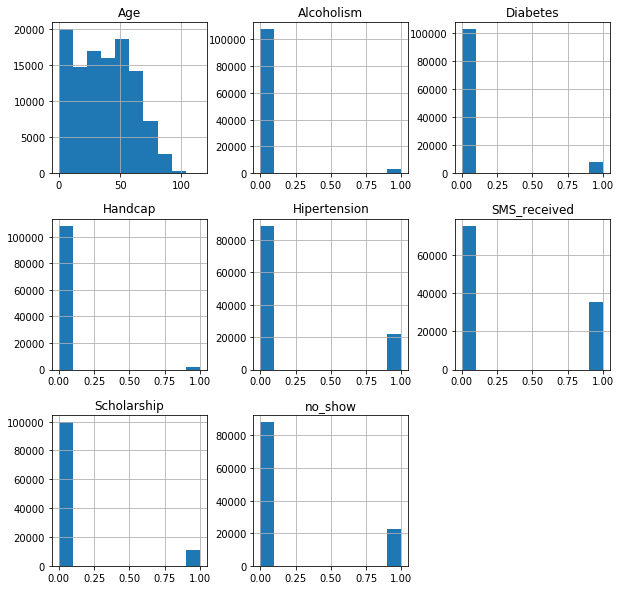

In [611]:
# check the skewness between columns data
# observe the histograms for data consistence and distribution.

df.hist(figsize=(10,10), alpha=1);

In [612]:
# check number of patients who attended and didn't attend

num_all_patients = df['no_show'].value_counts()
print(num_all_patients)

0    88207
1    22319
Name: no_show, dtype: int64


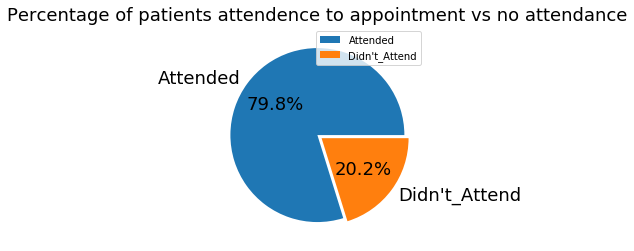

In [613]:
# Pie chart displays the percentage distribution of patient attendence to appointment vs non-attendance

plt.pie(num_all_patients,labels=["Attended", "Didn't_Attend"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of patients attendence to appointment vs no attendance",fontsize=18)
plt.legend()
plt.show()

**Only 20.2% didn't show-up for the scheduled appointment**.

In [614]:
#Lets distiguish attendance by gender with groupby.
x= df.groupby(['Gender', 'no_show']).count()



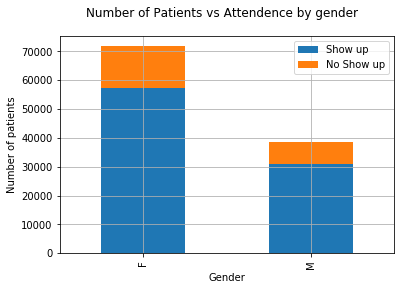

In [615]:
# lets visualise through a bar chat for gender vs attendance
x.PatientId.unstack().plot(kind='bar',stacked=True,grid=True)
plt.legend(['Show up', 'No Show up']) 
plt.suptitle('Number of Patients vs Attendence by gender') 
plt.ylabel('Number of patients'); 

* ** Females are booked more for appointments than males.**
* Now lets determine the propotional differences for represantation and appointment attendance

In [616]:
#check number of males vs males
n_males= df.query('Gender == "M"').Gender.value_counts()
n_females= df.query('Gender == "F"').Gender.value_counts()
 
print(n_males)
print(n_females)


M    38687
Name: Gender, dtype: int64
F    71839
Name: Gender, dtype: int64


In [617]:
#determine number of no_show between males and females

gender_no_show= df.groupby(['Gender', 'no_show'])['Gender'].count()
gender_no_show

Gender  no_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: Gender, dtype: int64

* This shows the no_show counts for attendence by gender.

In [618]:
# determine propotional distribution by gender and no_show appoinment
Pct_dist = gender_no_show.groupby(level=0).apply(lambda x:100 * x / int(x.sum()))
print(Pct_dist)

Gender  no_show
F       0          79.685129
        1          20.314871
M       0          80.032052
        1          19.967948
Name: Gender, dtype: float64


* This highlights the proportion of attendence by gender.

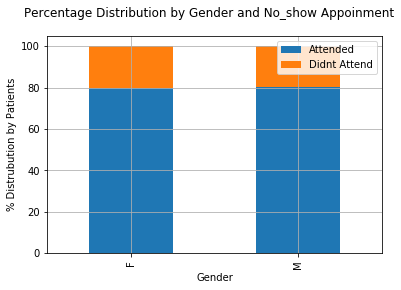

In [619]:
#Plot the bar chat to visualise the differences.
Pct_dist.unstack().plot(kind='bar',stacked=True,grid=True)
plt.legend(['Attended', 'Didnt Attend']) 
plt.suptitle('Percentage Distribution by Gender and No_show Appoinment') 
plt.ylabel('% Distrubution by Patients'); 

#### Important Findings
* Females have more appointments than males, hence gender can be an impotant factor influencing medical appointments.
 * Male and Female attendance rates are similar.
   * Males and females attendence rate at 80.03% and 79,68% respectevely.
   * Males and females non-attendence rate at 19,96% and 20.31% respectevely.
   
   **No direct correlation between gender and attendance**

###  Question 2:  How is age associated with show-up or no show-up?

In [620]:
# create and separate dfs for no attendance and attendace
df_attend= df.query('no_show==0')

df_non_attend=df.query('no_show==1')
df_non_attend.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
11,7542951368435.0,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1


* This determines dataframes by all ages either attendance or non-attendance

In [621]:
# create age categories 
# getting proportions for age categories

prop_infants = (df_attend.query("Age >=0 & Age<=1").count() / df.query("Age >=0 & Age<=1")["Age"].count())["Age"]
prop_kids= (df_attend.query("Age >=2 & Age<=12").count() / df.query("Age >=2 & Age<=12")["Age"].count())["Age"]
prop_teens= (df_attend.query("Age >=13 & Age<=19").count() / df.query("Age >=13 & Age<=19")["Age"].count())["Age"]
prop_adults= (df_attend.query("Age >=20 & Age<=60").count() / df.query("Age >=20 & Age<=60")["Age"].count())["Age"]
prop_olds = (df_attend.query("Age >=61").count() / df.query("Age >=61 ")["Age"].count())["Age"]

* This differentiates common age groups for easy classification for analysis: Attendence group

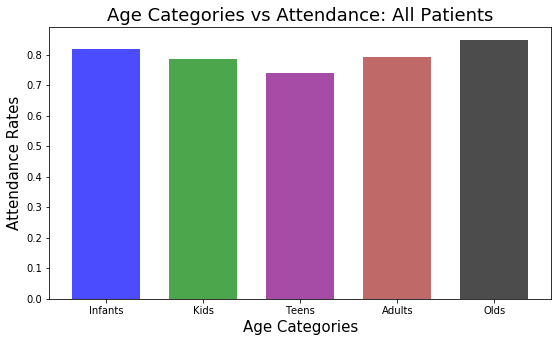

In [622]:
# plot to visualise age categories with attendance
age_count_attend = ["Infants","Kids","Teens","Adults","Olds"]
hights = [prop_infants,prop_kids,prop_teens,prop_adults,prop_olds]
width=0.7
plt.figure(figsize=(9,5))
plt.bar(age_count_attend, hights, width, color=["blue","green","purple","brown","black"], alpha = .7)
plt.ylabel("Attendance Rates",fontsize=15, color="k")
plt.xlabel("Age Categories",fontsize=15, color="k")
plt.title("Age Categories vs Attendance: All Patients", fontsize=18, color="k") 
plt.show();

In [623]:
# Repeat the same for non_attendence rates for all patients by category.
rate_infants = (df_non_attend.query("Age >=0 & Age<=1").count() / df.query("Age >=0 & Age<=1")["Age"].count())["Age"]
rate_kids= (df_non_attend.query("Age >=2 & Age<=12").count() / df.query("Age >=2 & Age<=12")["Age"].count())["Age"]
rate_teens= (df_non_attend.query("Age >=13 & Age<=19").count() / df.query("Age >=13 & Age<=19")["Age"].count())["Age"]
rate_adults= (df_non_attend.query("Age >=20 & Age<=60").count() / df.query("Age >=20 & Age<=60")["Age"].count())["Age"]
rate_olds = (df_non_attend.query("Age >=61").count() / df.query("Age >=61 ")["Age"].count())["Age"]

* This differentiates common age groups for easy classification for analysis: Non-Attendence group

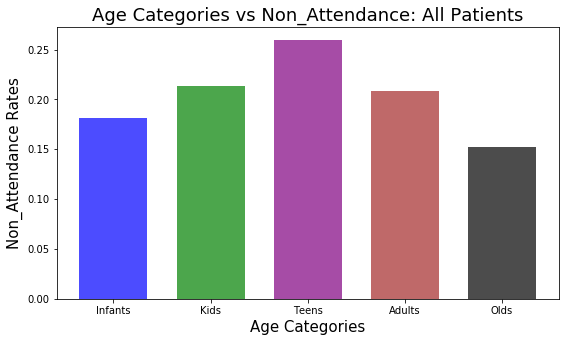

In [624]:
# Plot age categories vs non-attendance and visualise 
age_count_non_attend = ["Infants","Kids","Teens","Adults","Olds"]
hights = [rate_infants,rate_kids,rate_teens,rate_adults,rate_olds]
width=0.7
plt.figure(figsize=(9,5))
plt.bar(age_count_non_attend, hights, width, color=["blue","green","purple","brown","black"], alpha = .7)
plt.ylabel("Non_Attendance Rates",fontsize=15, color="k")
plt.xlabel("Age Categories",fontsize=15, color="k")
plt.title("Age Categories vs Non_Attendance: All Patients", fontsize=18, color="k") 
plt.show();


### Imported Insights

* Infants and old patients have higher attendence rates to appointments

* Teens have higher non-attendence rates to medical appointments

**Further investigations are neccessary to determine why teeanagers' commitment to attend for medical appointments is lower, whilst for infants and old people is higher**

### Question 2: Are any the of chronic conditions or other ailments associated with the outcomes?
* **Chronic conditions: Hypertension, Alcoholism and Diabetes**
* **Other: Handcapped**


In [625]:
# create a df_c for all patients who didn't attend the appointment
df_c= df.query('no_show==1')
df_c.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
6,733688164476661.0,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3449833394123.0,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,1
11,7542951368435.0,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,1
17,14794966191172.0,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,1
20,622257462899397.0,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,1


In [626]:
# create a df for all patients who attended the appointment
df_nc= df.query('no_show==0')
df_nc.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0


In [627]:
# group all chronic patients who didn't attend and count
df_chronic= df_c.groupby(['Hipertension', 'Alcoholism',  'Diabetes'])['no_show'].value_counts()
df_chronic

Hipertension  Alcoholism  Diabetes  no_show
0             0           0         1          17838
                          1         1            276
              1           0         1            420
                          1         1             13
1             0           0         1           2433
                          1         1           1095
              1           0         1            198
                          1         1             46
Name: no_show, dtype: int64

* Grouped all chronic patients who didn't attend and count

In [628]:
# group all chronic patients attended and count
df_nchronic= df_nc.groupby(['Hipertension', 'Alcoholism',  'Diabetes'])['no_show'].value_counts()
df_nchronic

Hipertension  Alcoholism  Diabetes  no_show
0             0           0         0          67473
                          1         0           1105
              1           0         0           1537
                          1         0             63
1             0           0         0          11811
                          1         0           5135
              1           0         0            873
                          1         0            210
Name: no_show, dtype: int64

In [629]:
# determine percentage distribution chronic patients who didn't attend
Pct_dist = df_chronic.groupby(level=1).apply(lambda x:100 * x / int(x.sum()))
print(Pct_dist)

Hipertension  Alcoholism  Diabetes  no_show
0             0           0         1          82.423066
                          1         1           1.275298
              1           0         1          62.038405
                          1         1           1.920236
1             0           0         1          11.242029
                          1         1           5.059606
              1           0         1          29.246677
                          1         1           6.794682
Name: no_show, dtype: float64


In [630]:
# determine percentage distribution chronic patients who  attended
Pct_ndist = df_nchronic.groupby(level=1).apply(lambda x:100 * x / int(x.sum()))
print(Pct_ndist)

Hipertension  Alcoholism  Diabetes  no_show
0             0           0         0          78.893644
                          1         0           1.292035
              1           0         0          57.286619
                          1         0           2.348118
1             0           0         0          13.810159
                          1         0           6.004163
              1           0         0          32.538204
                          1         0           7.827059
Name: no_show, dtype: float64


In [631]:
# lets seperate for each condition for better clarity.
# determine attendance rate for hypertensive patients
df_hyp= df.groupby(['Hipertension'])['no_show'].count()
df_hyp

Hipertension
0    88725
1    21801
Name: no_show, dtype: int64

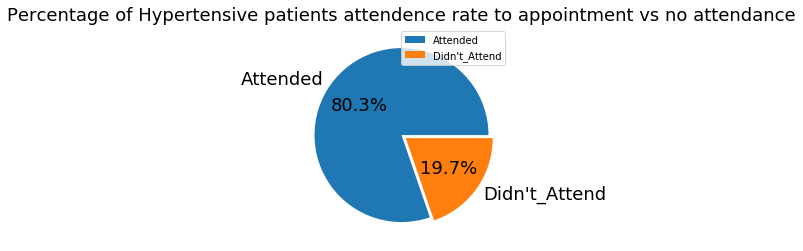

In [632]:
# Plot a pie chat 
plt.pie(df_hyp,labels=["Attended", "Didn't_Attend"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of Hypertensive patients attendence rate to appointment vs no attendance",fontsize=18)
plt.legend()
plt.show()

In [633]:
# determine attendance rate for alcoholic patients
df_alc= df.groupby(['Alcoholism'])['no_show'].count()
df_alc

Alcoholism
0    107166
1      3360
Name: no_show, dtype: int64

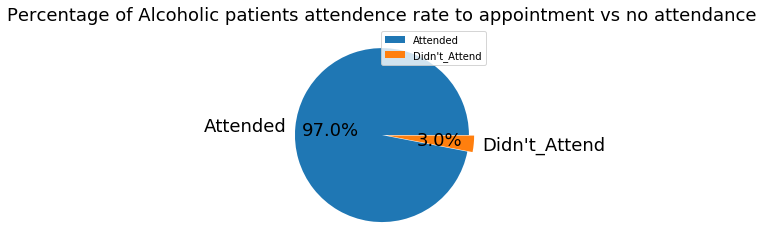

In [634]:
plt.pie(df_alc,labels=["Attended", "Didn't_Attend"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of Alcoholic patients attendence rate to appointment vs no attendance",fontsize=18)
plt.legend()
plt.show()

In [635]:
# determine attendance rate for diabetic patients
df_dib= df.groupby(['Diabetes'])['no_show'].count()
df_dib

Diabetes
0    102583
1      7943
Name: no_show, dtype: int64

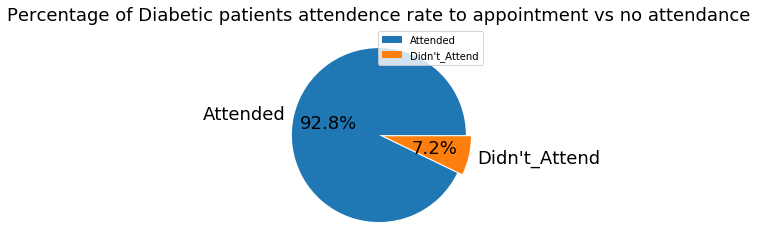

In [636]:
plt.pie(df_dib,labels=["Attended", "Didn't_Attend"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of Diabetic patients attendence rate to appointment vs no attendance",fontsize=18)
plt.legend()
plt.show()

In [637]:
# determine attendance rate for handcapped patients
df_hcp= df.groupby(['Handcap'])['no_show'].count()
df_hcp

Handcap
0    108285
1      2241
Name: no_show, dtype: int64

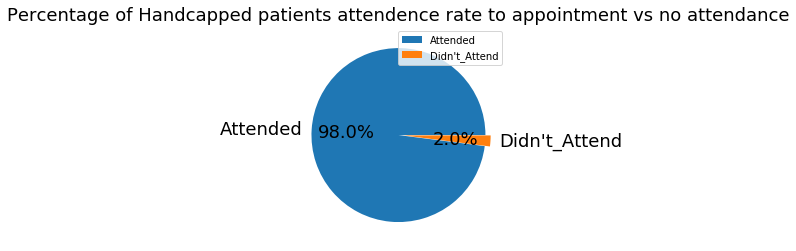

In [638]:
plt.pie(df_hcp,labels=["Attended", "Didn't_Attend"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of Handcapped patients attendence rate to appointment vs no attendance",fontsize=18)
plt.legend()
plt.show()

In [639]:
#determine df with no condition
df_no_cond= df.query('Hipertension==0 or Alcoholism==0 or Diabetes==0 or Handcap==0')
df_no_cond

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0


In [640]:
# from df no_condition get % rate of attendence and compare attendance rates vs all conditions.
pd_nc= df_no_cond.groupby(['no_show'])['no_show'].count()
pd_nc

no_show
0    88198
1    22315
Name: no_show, dtype: int64

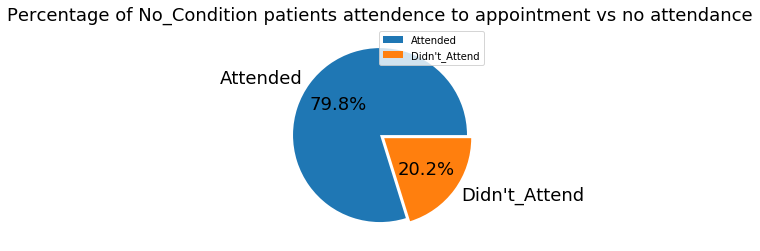

In [641]:
plt.pie(pd_nc,labels=["Attended", "Didn't_Attend"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of No_Condition patients attendence to appointment vs no attendance",fontsize=18)
plt.legend()
plt.show();

### Important Insights

* Of all three chronic conditions, the percentage of non-attendance was higher in hypertensive (19.7%) patients compared to other conditions.

* For those handicapped the percentage of non-attendance was lower compared to all chronic conditions measured.
* **However patients without any condition mentioned in the dataset had a higher non-attendance percentage (20.2%) compared to patients with  conditions.**


### Question 3: Does the use of SMS alerts improves the outcome?



In [642]:
# create  df_sms to check for value counts
df_sms = df.SMS_received.value_counts()
df_sms

0    75044
1    35482
Name: SMS_received, dtype: int64

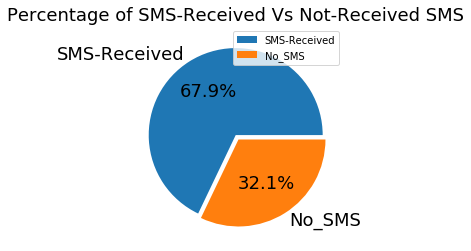

In [643]:
# visualise percentage distribution for those that received and not_received sms
plt.pie(df_sms,labels=["SMS-Received", "No_SMS"], autopct='%1.1f%%', textprops={'fontsize': 18},explode = (0, 0.06))
plt.rcParams['font.size'] = 10
plt.title("Percentage of SMS-Received Vs Not-Received SMS",fontsize=18)
plt.legend()
plt.show();

In [644]:
# check sms and no_show counts by groupby
pct_sms=df.groupby(['SMS_received'])['no_show'].value_counts()
pct_sms

SMS_received  no_show
0             0          62509
              1          12535
1             0          25698
              1           9784
Name: no_show, dtype: int64

In [645]:
# determine propotional distribution patients who received SMS and  attendence
Pct_sms = pct_sms.groupby(level=1).apply(lambda x:100 * x / int(x.sum()))
print(Pct_sms)

SMS_received  no_show
0             0          70.866258
              1          56.162911
1             0          29.133742
              1          43.837089
Name: no_show, dtype: float64


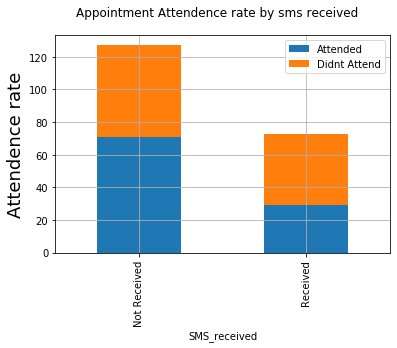

In [646]:
# plot a bar to visualise appointment attendence rate by sms received
Pct_sms.unstack().plot(kind='bar',stacked=True,grid=True)
plt.xticks([0, 1],['Not Received', 'Received'])
plt.legend(['Attended', 'Didnt Attend']) 
plt.suptitle('Appointment Attendence rate by sms received') 
plt.ylabel('Attendence rate', fontsize=18); 

#### Insights

* **29.1% of patients who didn't recieve SMS showed-up for the appointment**

* **On the contrarry 70.9% of patients who didn't receive SMS show-up.**

<a id='conclusions'></a>
## Conclusions

> **Findings**:
* The analysis was limited to the questions provided.

* From the data, the majority of patients  showed-up to their scheduled appointment.

* Females represent a major portion for medical appointment than males, 65% compared to 35%.

* No significant differences in gender and medical appointment rates were observed from this data.

* Infants and old patients have higher attendence rates to appointments than other age categories, with teens having a higher non-attendence rates to medical appointments.

* Of all three chronic conditions, the percentage of non-attendance was higher in hypertensive (19.7%) patients compared to other conditions.

* For those handicapped the percentage of non-attendance was lower compared to all chronic conditions measured. However patients without any condition mentioned in the dataset had a higher non-attendance percentage (20.2%) compared to patients with conditions.

* About 29.1% of patients who didn't recieve SMS showed-up for the appointment and on the contrarry 70.9% of patients who didn't receive SMS show-up for medical appointments.However, due to the fact that majority of patients didn't receive SMS,hence potential for bias may need further investigations.






**Limitations:**
* The data was limited to only three months.
* Scheduled_day and Appointment_day columns had missing or inconsistent:
  - for instance, Appointment_day column had date without hours, minutes, and seconds
* The data set contains some rows with schedule months 11 & 12 in 2015, while all appointments are in 2016.
* No further information on the scales or measurement criteria used for Handcap data capturing.


